## Introduction to NumPy 介绍

> This chapter, along with chapter 3, outlines techniques for effectively loading, storing, and manipulating in-memory data in Python.
The topic is very broad: datasets can come from a wide range of sources and a wide range of formats, including be collections of documents, collections of images, collections of sound clips, collections of numerical measurements, or nearly anything else.
Despite this apparent heterogeneity, it will help us to think of all data fundamentally as arrays of numbers.

這個主題非常廣泛：數據集可能來自非常不同的來源和非常不同的格式，包括文檔的集合，圖像的集合，聲音片段的集合，數值測量的集合，甚至其他任何東西的集合。儘管數據集有著超出想像的異質性，我們還是可以將所有的數據抽象成為數值組成的數組。

> For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science.
We'll now take a look at the specialized tools that Python has for handling such numerical arrays: the NumPy package, and the Pandas package (discussed in Chapter 3).This chapter will cover NumPy in detail. NumPy (short for *Numerical Python*) provides an efficient interface to store and operate on dense data buffers.
In some ways, NumPy arrays are like Python's built-in ``list`` type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use effectively will be valuable no matter what aspect of data science interests you.For the pieces of the package discussed here, I'd recommend NumPy version 1.8 or later.
By convention, you'll find that most people in the SciPy/PyData world will import NumPy using ``np`` as an alias:

因此，有效的存儲和處理數值數組對於數據科學來說是最根本的能力。我們接下來會討論Python中具備這樣強大功能的特殊工具：NumPy和Pandas (Numerical Python)，它提供了強大的接口供我們存儲和操作非稀疏數據集合。在某些情況下，NumPy的數組表現得就像Python內建的`列表`，但是NumPy數組在存儲和操作大量數據集合的時候提供了有效得多的功能和性能。 NumPy數組是Python的數據科學領域工具鏈的核心，很多其他的工具都是在它的基礎上構建的，因此無論你感興趣的是數據科學的哪個領域，NumPy都值得你花時間進行鑽研。

> At the implementation level, the array essentially contains a single pointer to one contiguous block of data.
The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer we saw earlier.
Again, the advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type.
Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

下圖展示了動態類型的列表和固定類型的數組（NumPy實現的）的區別，從底層實現上看：
- 數組(array)僅僅包含一個指針指向一塊連續的內存空間。
- 列表(List)含有一個指針指向一塊連續的指針內存空間，裡面的每個指針再指向內存中每個獨立的Python對象，如我們前面看到的整數。

列表的優勢在於靈活：因為每個元素都是完整的Python的類型對象結構，包含了數據和類型信息，因此列表可以存儲任何類型的數據。 NumPy使用的固定類型的數組缺少這種靈活性，但是對於存儲和操作數據會高效許多。

![Array Memory Layout](https://github.com/wangyingsm/Python-Data-Science-Handbook/raw/e044d370f852cd3639bbe45ebc2eb3e6f11c1e62/notebooks/figures/array_vs_list.png)

## Creating Arrays from Python Lists

> First, we can use ``np.array`` to create arrays from Python lists: Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type.If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

首先，我們可以使用`np.array`來將一個Python列表變成一個數組，記住和Python列表不同，NumPy數組只能含有同一種類型的數據。如果類型不一樣，NumPy會嘗試向上擴展類型（下面例子中會將整數向上擴展為浮點數）：

In [1]:
import numpy as np
np.array([1, 4, 2, 5, 3])    # 整數

array([1, 4, 2, 5, 3])

In [2]:
np.array([1, 4, 2, 5, 3.0])  # 擴展

array([1., 4., 2., 5., 3.])

In [3]:
np.array([range(i, i + 3) for i in [2, 4, 6]]) #使用列表的列表來創建二維數組的方法

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### Creating 1D, 2D array

In [4]:
ar=np.array([1,2,3,4,5])
ar=np.array((2,3,4,5))
ar=np.array([[1,2,3], [4,5,6]])
ar

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
ar[1]

array([4, 5, 6])

### Creating 3D More array

In [6]:
arr=np.array([[[1,2,3], [5,6,7]], [[1,2,3], [5,6,7]]])
arr

array([[[1, 2, 3],
        [5, 6, 7]],

       [[1, 2, 3],
        [5, 6, 7]]])

In [7]:
print("ndim: ", arr.ndim)  #數組的維度
print("shape:", arr.shape) #數組的形狀
print("size: ", arr.size)  #數組的長度
print("itemsize:", arr.itemsize, "bytes")
print("nbytes:", arr.nbytes, "bytes")

ndim:  3
shape: (2, 2, 3)
size:  12
itemsize: 8 bytes
nbytes: 96 bytes


### Creating Arrays from Scratch

> Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy.
Here are several examples:

使用NumPy的方法從頭創建數組會更加高效，特別對於大型數組來說。

In [8]:
np.zeros((3,4), dtype=float)  # zeros 將數組元素都填充為0
np.ones((3,4), dtype=float)   # ones  將數組元素都填充為1
np.full((3,4), 76)            # full  將數組元素都填充為x
np.empty((3, 4))
np.eye(2)                     #自動完程同步矩陣列 1x1 2x2 3x3

array([[1., 0.],
       [0., 1.]])

In [9]:
np.zeros(10, dtype=int)
np.ones(10, dtype=int)
np.full(10, 3.14)
np.empty(3)

array([4.64941804e-310, 0.00000000e+000, 1.58101007e-322])

In [10]:
# arange 創建一段序列值包含[起始,結尾,步長]
np.arange(10)           #From 0-10
np.arange(0, 20, 2)     #From 0-20 step 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [11]:
# linspace 創建一段序列值進行平均劃分 [起始,結尾,共有幾個元素]
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### Transposing Arrays and Swapping Axes

In [12]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [13]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [14]:
np.dot(arr.T, arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

In [15]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[6, 23], [-1, 7], [8, 9]])
np.dot(x, y)

array([[ 28,  64],
       [ 67, 181]])

- transpose & swapaxes

In [16]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [17]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [18]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Plotting a two-dimensional function 繪製二維函數的圖形

> One place that broadcasting is very useful is in displaying images based on two-dimensional functions.
If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid:

廣播還有一個很有用的場景，就是當你需要繪製一個二維函數的圖像時。如果我們希望定義一個函數$z = f(x, y)$，廣播可以被用來計算二維平面上每個網格的數值：

In [19]:
# x和y都是0~5範圍平均分的50個點
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

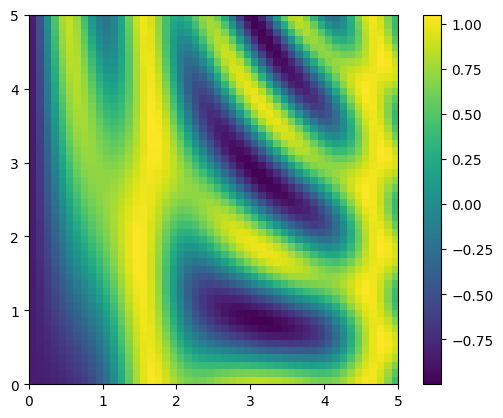

In [21]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

### Example: Random Walks

In [22]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [23]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

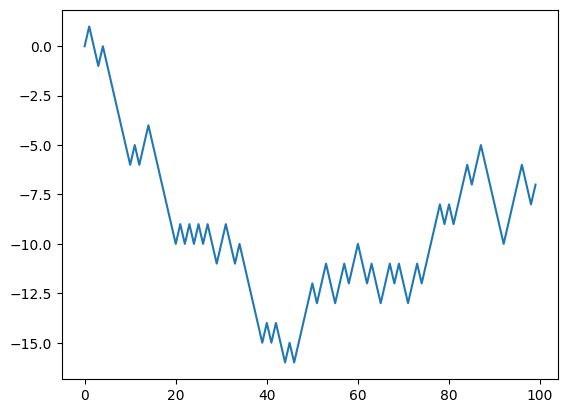

In [24]:
plt.plot(walk[:100])

In [25]:
np.random.seed(12345)

In [26]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [27]:
walk.min()
walk.max()

31

In [28]:
(np.abs(walk) >= 10).argmax()

37

### Simulating Many Random Walks at Once

In [29]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [30]:
walks.max()
walks.min()

-133

In [31]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3410

In [32]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [33]:
steps = np.random.normal(loc=0, scale=0.25,size=(nwalks, nsteps))
steps

array([[-0.02565707,  0.36310961,  0.41720151, ...,  0.15726638,
        -0.16256773,  0.05423703],
       [-0.10456259,  0.07877516,  0.19110411, ...,  0.07678875,
        -0.18545695,  0.0333151 ],
       [-0.16728617,  0.12034941, -0.30427248, ..., -0.30982359,
        -0.17291787,  0.02772071],
       ...,
       [ 0.27987403,  0.05477886, -0.02167382, ...,  0.02795479,
         0.25268149,  0.06510672],
       [ 0.31853634, -0.15109745, -0.1121375 , ...,  0.14705719,
         0.18206871, -0.02473096],
       [-0.13101904, -0.24008233, -0.03925202, ..., -0.18320903,
        -0.20967376,  0.20705573]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=11e28d68-6061-415e-ac8d-701c34a8fb9e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>